# Wine Quality #

### Portugal is a top ten wine exporting country with 3.17% of the market share in 2005. To support its growth, the wine industry is investing in new technologies for both wine making and selling processes. Wine certification and quality assessment are key elements within this context. Certification prevents the illegal adulteration of wines (to safeguard human health) and assures quality for the wine market. Quality evaluation is often part of the certification process and can be used to improve wine making (by identifying the most influential factors) and to stratify wines such as premium brands (useful for setting prices).

### In this practice exercise, you will work on a wine dataset, create data mining models to help predict wine quality, and identify key factors in this quality evaluation process.


# Variables:

**fixed acidity**

**volatile acidity**

**citric acid**

**residual sugar**

**chlorides**

**free sulfur dioxide**

**total sulfur dioxide**

**density**

**pH**

**sulphates**

**alcohol**

**quality**: 0 (low quality),1 (high quality)


##Instructions

### 1. follow the steps in this python file to create 1) a decision tree model 2) logistic regression model, and other analysis
### 2. If you are asked to input numerical values, please keep 3 digits after decimal

**Step 1**: Read wine data into file

In [14]:
path = "/Users/margaretocallaghan/VSCode.ARM/PersonalProjects/Wine-Quality/winequality-red.csv"

In [15]:
import pandas as pd
wine = pd.read_csv(path)

**Step 2**: Check the following: 
- If wine data has missing values
- The dimension of the wine dataset
- How many rows and columns

In [16]:
# Lets have a look at the first few rows of the dataset to get a better idea of what we're looking at
wine.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [17]:
wine.tail(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,1


In [18]:
# Now we will check for missing values
wine.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [19]:
# Lets check the number of dimensions
wine.ndim

2

In [20]:
# And now we'll check the shape, which tells us number of rows and columns
wine.shape

(1599, 12)

**Step 2 Answers**
- There are no missing values in this dataset
- This dataset is two dimensional
- There are 1,599 rows and 12 columns

**Step 3**: How many rows/records/data points in the wine dataset have high quality?

In [21]:
# This counts the values in the 'quality' column, with 1 being high quality wine and 0 being everything else
wine['quality'].value_counts()

quality
1    855
0    744
Name: count, dtype: int64

**Step 3 Answers**: 855 out of the 1,599 records are labeled as 'high quality'

**Step 4**: Explore the summary statistics for all numerical variables. Which variable has the highest mean value?

In [23]:
# .describe will give summary statistics for all variables
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,0.534709
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.498950
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,1.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,1.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,1.000000


**Step 4 Answer**: Total Sulfur Dioxide has the highest mean value

**Step 5**: Assign all predictors to X object and the target variable to y object using .iloc[ , ]. Remember python index starts from 0. You may check X object and see if you have included the right number of predictors.


In [24]:
X = wine.iloc[ :, 0:11]
y = wine.iloc[ :, 11]

**Step 6**: Since the variables in wine dataset significantly vary in their value ranges, we need to perform the feature scaling to all predictors. Please use .StandardScaler() to standardize the predictors, and save the values after standardization to **X_standardized**

In [27]:
import numpy as np
# import pandas as pd
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()

# Transforming the numerical feature
X_standardized = scaler.fit_transform(X)

# Creating a dataframe to save scaled features
standardized_X_df = pd.DataFrame(X_standardized,columns=X.columns)

# Show summary statistics after standardization
standardized_X_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03
mean,3.554936e-16,1.733031e-16,-8.887339e-17,-1.244227e-16,3.732682e-16,-6.221137e-17,4.443669e-17,-3.473172e-14,2.861723e-15,6.754377e-16,7.109871e-17
std,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00
min,-2.137045e+00,-2.278280e+00,-1.391472e+00,-1.162696e+00,-1.603945e+00,-1.422500e+00,-1.230584e+00,-3.538731e+00,-3.700401e+00,-1.936507e+00,-1.898919e+00
25%,-7.007187e-01,-7.699311e-01,-9.293181e-01,-4.532184e-01,-3.712290e-01,-8.487156e-01,-7.440403e-01,-6.077557e-01,-6.551405e-01,-6.382196e-01,-8.663789e-01
50%,-2.410944e-01,-4.368911e-02,-5.636026e-02,-2.403750e-01,-1.799455e-01,-1.793002e-01,-2.574968e-01,1.760083e-03,-7.212705e-03,-2.251281e-01,-2.093081e-01
75%,5.057952e-01,6.266881e-01,7.652471e-01,4.341614e-02,5.384542e-02,4.901152e-01,4.723184e-01,5.768249e-01,5.759223e-01,4.240158e-01,6.354971e-01
max,4.355149e+00,5.877976e+00,3.743574e+00,9.195681e+00,1.112703e+01,5.367284e+00,7.375154e+00,3.680055e+00,4.528282e+00,7.918677e+00,4.202453e+00


**Step 7**: Use the .LabelEncoder() to code the target variable

In [29]:
from sklearn.preprocessing import LabelEncoder
labelencoder_wine = LabelEncoder()
y = labelencoder_wine.fit_transform(wine['quality'].values)

In [30]:
y

array([0, 0, 0, ..., 1, 0, 1], shape=(1599,))

**Step 8**: Now we split the data into training set and test set. We use **25%** of the data as the test set. Remember: 
1. set the **random_state = 0** and 
2. use the values after the standardization. **Remember you have standardzied the X**

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_standardized,y, test_size= 0.25, random_state= 0)

# Step 9: Create a decision tree model

### Now we are ready to create data mining models on the training set and evaluate it on the test set.

First let's create a regular decision tree model callned **tree** using .DecisionTreeClassifer() and train it using the training data. Please set 
1. **random_state = 0** and 
2. with all parameters with default values.


In [32]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


### Then we evaluate this model on the test set using .predict(). First we estimate the accuracy on training set using .score() and accuracy on the test set using.accuracy_score. Do you think the model has the issue of overfitting? Why?

In [33]:
print("Accuracy on the training set:{:.3f}".format(tree.score(X_train, y_train)))

Accuracy on the training set:1.000


In [34]:
y_pred = tree.predict(X_test)

In [35]:
from sklearn.metrics import accuracy_score
print("Accuracy on the test set: {:.3f}".format(accuracy_score(y_pred,y_test)))

Accuracy on the test set: 0.765


**Step 9 Answer**: The model most definitely has an issue of overfitting as it is 100% accurate on the training data. While accuracy is what we strive for, 100% is simply unrealistic and points to a high chance of being overfitted. This is further proven when we evaluate this model on the test data, which is data it has never seen before, and we get 76.5% accuracy. This shows that the model is overfitted to the test data, and not that it is necessarily a perfect prediction model.

# Step 10: Prune the decision tree model

### Now let's prune the overfitted decision tree. We create a new decision tree model called **tree_pruned**, and set **max_depth = 2 , random_state = 0**, and fit it using training data as well.


In [36]:
# Limiting the depth of the tree by setting max_depth = 2
tree_pruned = DecisionTreeClassifier(max_depth=2, random_state=0)
tree_pruned.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


### Then we use this model to make predictions on test set using .predict(), and save the predicted target value on test set in **y_pruned_pred**. Take a look at the model accuracy on training set and test set. What is the model accuracy on test set?


In [39]:
# Evaluating the pruned tree on test set, to hopefully see improvement of model performance on test set
y_pruned_pred = tree_pruned.predict(X_test)
print("Accuracy on the training set:{:.3f}".format(tree_pruned.score(X_train, y_train)))
print("Accuracy on the test set:{:.3f}". format(accuracy_score(y_pruned_pred, y_test)))

Accuracy on the training set:0.687
Accuracy on the test set:0.700


The model accuracy on the test set is 70%, which is lower than before

It is possible that the tree was pruned too much. Lets graph the accuracy of the model (test data) in relation to the depth (1-10)

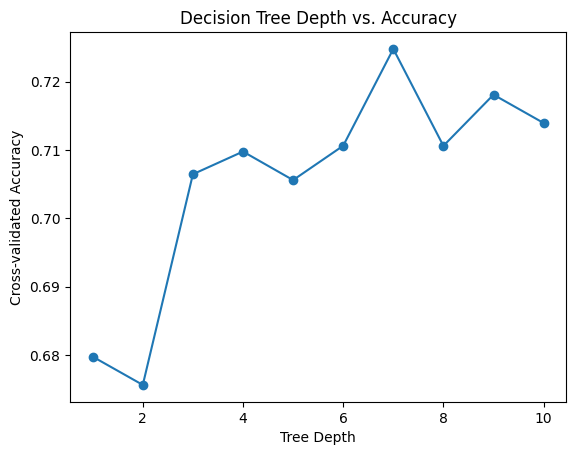

In [40]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

depths = range(1, 11)
scores = []

for d in depths:
    tree1 = DecisionTreeClassifier(max_depth=d, random_state=0)
    score = cross_val_score(tree1, X_train, y_train, cv=5).mean()
    scores.append(score)

plt.plot(depths, scores, marker='o')
plt.xlabel('Tree Depth')
plt.ylabel('Cross-validated Accuracy')
plt.title('Decision Tree Depth vs. Accuracy')
plt.show()

### Now let's figure out which variable is most important to predict the wine quality in **this pruned tree model**. Create a dataframe called **importance** to show the feature importance which is saved in **.feature_importances_** attribute. Which variable is the most important indicator to predict the wine quality?


In [43]:
# Lets save the names of predictors into wine_feature_names object
wine_feature_names = wine.iloc[ :,0:11].columns.tolist()
wine_feature_names

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [44]:
importance = pd.DataFrame(tree_pruned.feature_importances_, index = wine_feature_names, columns=['Importance'])
importance.sort_values(by="Importance", ascending=False)

,Importance
alcohol,0.690878
sulphates,0.309122
fixed acidity,0.000000
volatile acidity,0.000000
citric acid,0.000000
residual sugar,0.000000
chlorides,0.000000
free sulfur dioxide,0.000000
total sulfur dioxide,0.000000
density,0.000000


The most important indicator to predict wine quality is first alcohol, then sulphates

# Step 11: Create a Logistic Regression Model

### It is usually not sufficient to only try with one model. We may need to create different models on the same dataset and see which one returns us the best model performance. Let's create a logistic regression model on the same dataset.

### Create a logistic regression model named logreg using .LogisticRegression(), and fit it using the same training set.

In [45]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


### Then we use this model to make predictions on test set, and save the predicted target values in **y_pred_logreg**. Then we evaluate the logistic regression model performance on the test set using accuracy_score. What is model performance on the test set?

In [46]:
y_pred_logreg = logreg.predict(X_test)
y_pred_logreg

array([1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,

In [54]:
# Training accuracy
print("Training accuracy: {:.3f}".format(logreg.score(X_train, y_train)))
# Test accuracy
print("Test accuracy: {:.3f}".format(logreg.score(X_test, y_test)))

Training accuracy: 0.742
Test accuracy: 0.752


In [47]:
from sklearn import metrics
cf_matrix = metrics.confusion_matrix(y_test,y_pred_logreg)
cf_matrix

array([[134,  51],
       [ 48, 167]])

In [48]:
print("Accuracy:{:.3f}".format(metrics.accuracy_score(y_test,y_pred_logreg)))

Accuracy:0.752


**Step 11 Answer**: The logistic regression model is 75.2% accurate on the test data

### Step 12: Create a confusion matrix for **logistic regression model** on **test set**. How may wines have low quality but are predicted to have high quality?

In [51]:
from sklearn.metrics import confusion_matrix
tree_cm = confusion_matrix(y_test, y_pred_logreg)
print("Confusion Matrix. :\n{}".format(tree_cm))

Confusion Matrix. :
[[134  51]
 [ 48 167]]


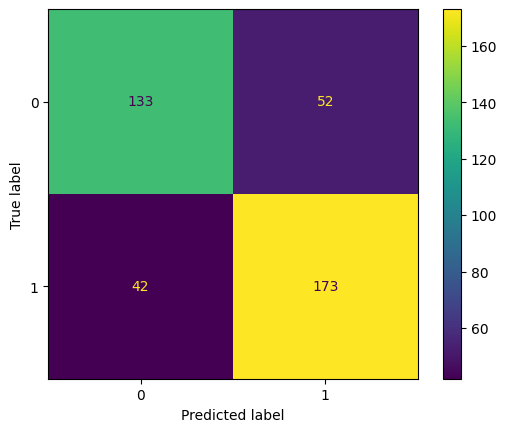

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(tree, X_test, y_test)

According to the model performance of the three models I created:

1. **Unpruned Decision Tree**
    - Very high training accuracy (100%)
    - Lower test accuracy (76.5%)
    - Overfits the training data
2. **Pruned Decision Tree (max_depth=2)**
    - Lower training accuracy (68.7%)
    - Lower test accuracy (70%)
    - Likely underfitting the data
3. **Logistic Regression**
    - Training accuracy (74.2%)
    - Test accuracy (75.2%)
    - More balanced and less likely to overfit

The best model to use for future prediction would be the logistic regression model, as it provides the best test accuracy without the problem of overfitting.